Task 2
Data Description:
survival 	0 => No , 1 => Yes
pclass	    Ticket class	      1 => 1st , 2 => 2nd , 3 => 3rd
sex	        Sex	
Age	        Age in years	
sibsp	    No. of siblings / spouses aboard the Titanic	
parch	    No. of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation	   C => Cherbourg , Q => Queenstown , S => Southampton

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
trained_data = pd.read_csv(r"C:\Users\mohamed mohsin\Downloads\train.csv")  #reading dataset Csv file test
test_data = pd.read_csv(r"C:\Users\mohamed mohsin\Downloads\test.csv")      #reading dataset Csv file train


In [24]:
trained_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
trained_data.shape           #displays the number of Rows & Columns in trained_data table

(891, 12)

In [27]:
trained_data.isna().sum()   #shows the NAN values in each column 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
trained_data.fillna(0, inplace=True)   #replaces NAN values with zero

In [34]:
trained_data.describe(include="all")            #full description of trained_data table

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [52]:
trained_data_edited = trained_data.loc[:, ~trained_data.columns.isin(['Cabin' , 'Embarked' ,'Ticket' , 'Name' , 'Sex'])]

trained_data_edited   #create a filtered dataframe that contains only columns with numerical data types.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [53]:
trained_data_edited.groupby('Survived').mean()   #mean of each column grouped by survival   0->No , 1->Yes

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [63]:
trained_data['Sex'].value_counts()   #number of females and males on titanic

Sex
male      577
female    314
Name: count, dtype: int64

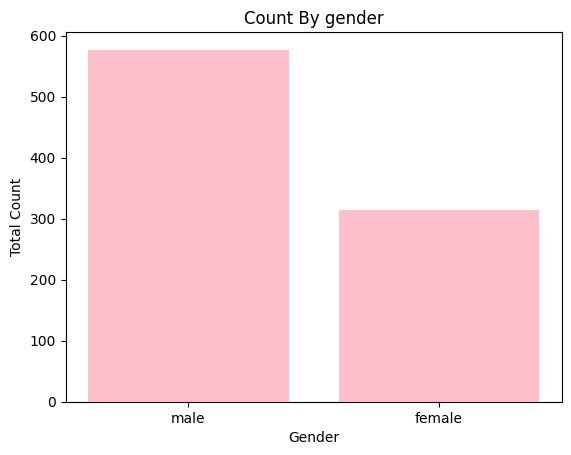

In [69]:
sex = ['male' , 'female']
ind = [577 , 314]
plt.bar(sex , ind , color = 'pink')
plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.title('Count By gender')
plt.show()

In [64]:
trained_data_edited.corr()   #correlation between values   --->     "0 -> negative relationship & 1 -> positive relationship"

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

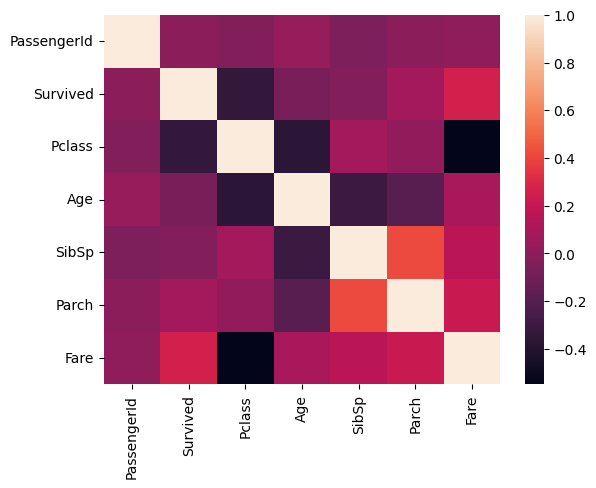

In [71]:
sns.heatmap(trained_data_edited.corr())

In [65]:
trained_data_edited.std()   #standard deviation of values

PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

<Axes: >

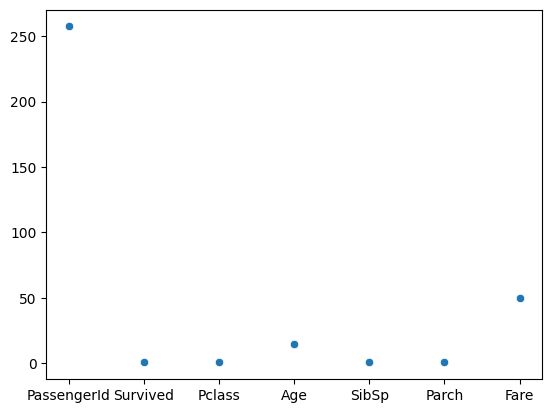

In [76]:
sns.scatterplot(trained_data_edited.std())

In [77]:
trained_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

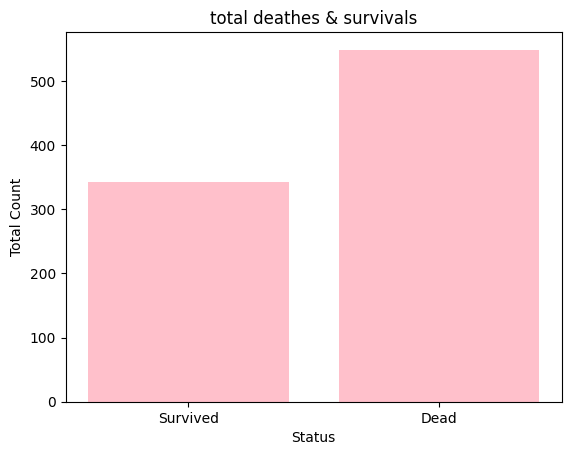

In [78]:
Survival_or_death = ['Survived' , 'Dead'] #where survived = 1 and dead = 0
index = [342,549] #dead ->549 , survived -> 342
plt.xlabel('Status')
plt.ylabel('Total Count')
plt.title('total deathes & survivals')
plt.bar(Survival_or_death , index , color = 'pink')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

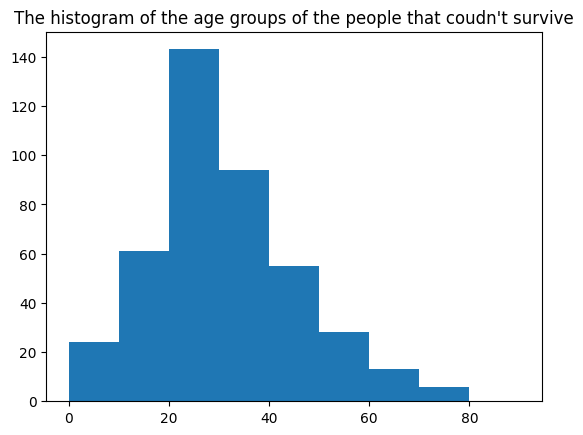

In [83]:
age_groups  = trained_data.loc[trained_data.Survived == 0, 'Age']  # used to get the age of the people who has not survive
index = np.arange(0,100,10)  #each bin is representing a range of 10 years 
plt.hist(age_groups ,index)
plt.title('The histogram of the age groups of the people that coudn\'t survive')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

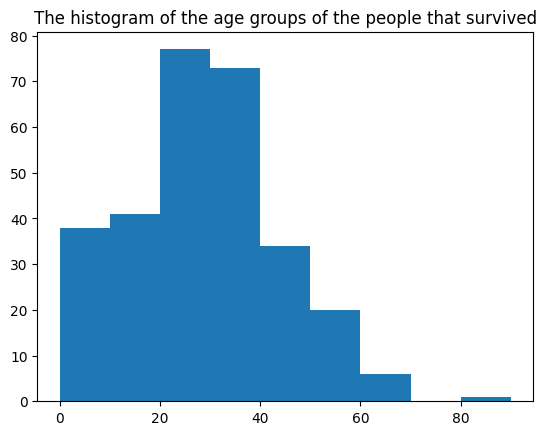

In [89]:
age_groups  = trained_data.loc[trained_data.Survived == 1, 'Age']  # used to get the age of the people who has survived
index = np.arange(0,100,10)   #each bin is representing a range of 10 years
plt.hist(age_groups ,index)
plt.title('The histogram of the age groups of the people that survived')
plt.show